<a href="https://colab.research.google.com/github/21PA1A6132/MACHINE-LEARNING/blob/main/Gradient_Descent_Combined_Cycle_Power_Point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INFORMATION ABOUT THE DATASET

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Data = np.loadtxt('/content/drive/MyDrive/Machine Learning/training_ccpp_x_y_train.csv',delimiter=',')

In [ ]:
Data.shape

(7176, 5)

In [ ]:
x = Data[:,:4]
y = Data[:,4]

In [ ]:
print(x.shape)
print(y.shape)

(7176, 4)
(7176,)


In [ ]:
c_column = np.ones((x.shape[0],1))
x = np.append(x,c_column,axis=1)

In [ ]:
x.shape

(7176, 5)

In [ ]:
def step_gradient(x,y,alpha,m):
    M = x.shape[0]
    m_slope = (-2/M)*(((y - (x*m).sum(axis=1)).reshape(-1, 1))*x).sum(axis=0)
    m = m - alpha * m_slope
    return m

In [ ]:
def cost(x,y,m):
    return ((y - (x*m).sum(axis=1)) ** 2).mean()


In [ ]:
def gradient(x,y,training_itrerations,learning_rate):

  m = np.zeros(x.shape[1])
  costs = []
  for i in range(training_iterations):
    m = stepgrad(x, y, learning_rate, m)
    if i % 1000 == 0:  # Record cost every 10 iterations
      current_cost = cost(x, y, m,)
      costs.append(current_cost)
      print(i, "Cost:", current_cost)
  return m, costs

In [ ]:
training_iterations=100000
learning_rate =0.000000955555
m,costs= gradient(x,y,training_iterations,learning_rate)

print("Final coefficients:",m)


0 Cost: 198151.27763733498
1000 Cost: 130.01050901465985
2000 Cost: 81.05094429119002
3000 Cost: 60.643435901541814
4000 Cost: 51.22749927173659
5000 Cost: 46.38157488291396
6000 Cost: 43.61146628597521
7000 Cost: 41.86980201059933
8000 Cost: 40.676871976348465
9000 Cost: 39.79419570872854
10000 Cost: 39.09508569164849
11000 Cost: 38.5089614388469
12000 Cost: 37.99522860595884
13000 Cost: 37.530036918447465
14000 Cost: 37.099152084786965
15000 Cost: 36.69395773146351
16000 Cost: 36.309154008281595
17000 Cost: 35.94141212050083
18000 Cost: 35.588580589786964
19000 Cost: 35.249214546256404
20000 Cost: 34.922295718351435
21000 Cost: 34.607065527147896
22000 Cost: 34.302925441432905
23000 Cost: 34.009377391810034
24000 Cost: 33.725988064618406
25000 Cost: 33.45236743957832
26000 Cost: 33.18815582773434
27000 Cost: 32.933015984945534
28000 Cost: 32.68662825824113
29000 Cost: 32.44868754647107
29000 Cost: 32.44868754647107
30000 Cost: 32.218901348188375
30000 Cost: 32.218901348188375


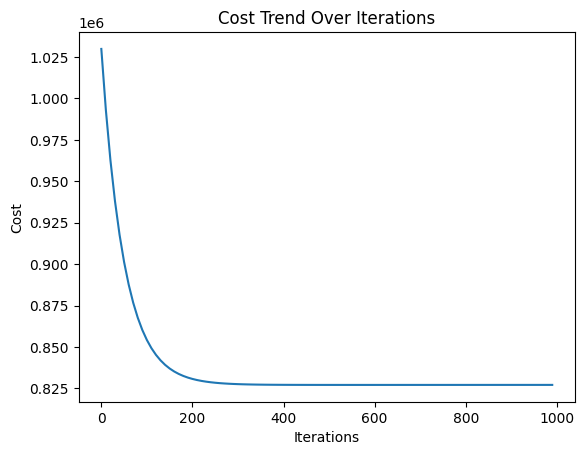

In [ ]:
# Plotting the cost trend
plt.plot(range(0, training_iterations, 10), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Trend Over Iterations')
plt.show()


In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [ ]:
y_pred_train = np.dot(x,m)
mse_train = mean_squared_error(y, y_pred_train)
r2_train = r_squared(y, y_pred_train)
print(f'Mean Squared Error on training data: {mse_train}')
print(f'R-squared on training data: {r2_train}')

Mean Squared Error on training data: 22.337094769657824
R-squared on training data: 0.9239076964609507


In [ ]:
x_test = np.loadtxt('/content/drive/MyDrive/Machine Learning/test_ccpp_x_test.csv',delimiter=',')
c_column = np.ones((x_test.shape[0],1))
x_test= np.concatenate((x_test,c_column),axis=1)

In [ ]:
y_pred_test = np.dot(x_test,m)

# Assuming 'y_pred_test' contains the predictions
np.savetxt('/content/drive/MyDrive/Machine Learning/cpp_y_pred_test.csv', y_pred_test, delimiter=',')

In [ ]:
y_pred_test.shape

(2392,)